In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
 import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Assign the demographics class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [9]:
# Assign the demographics class to a variable called `Station`
Station = Base.classes.station

In [10]:
# Create a session
session = Session(engine)

In [11]:
conn = engine.connect()

('2017-08-23',)


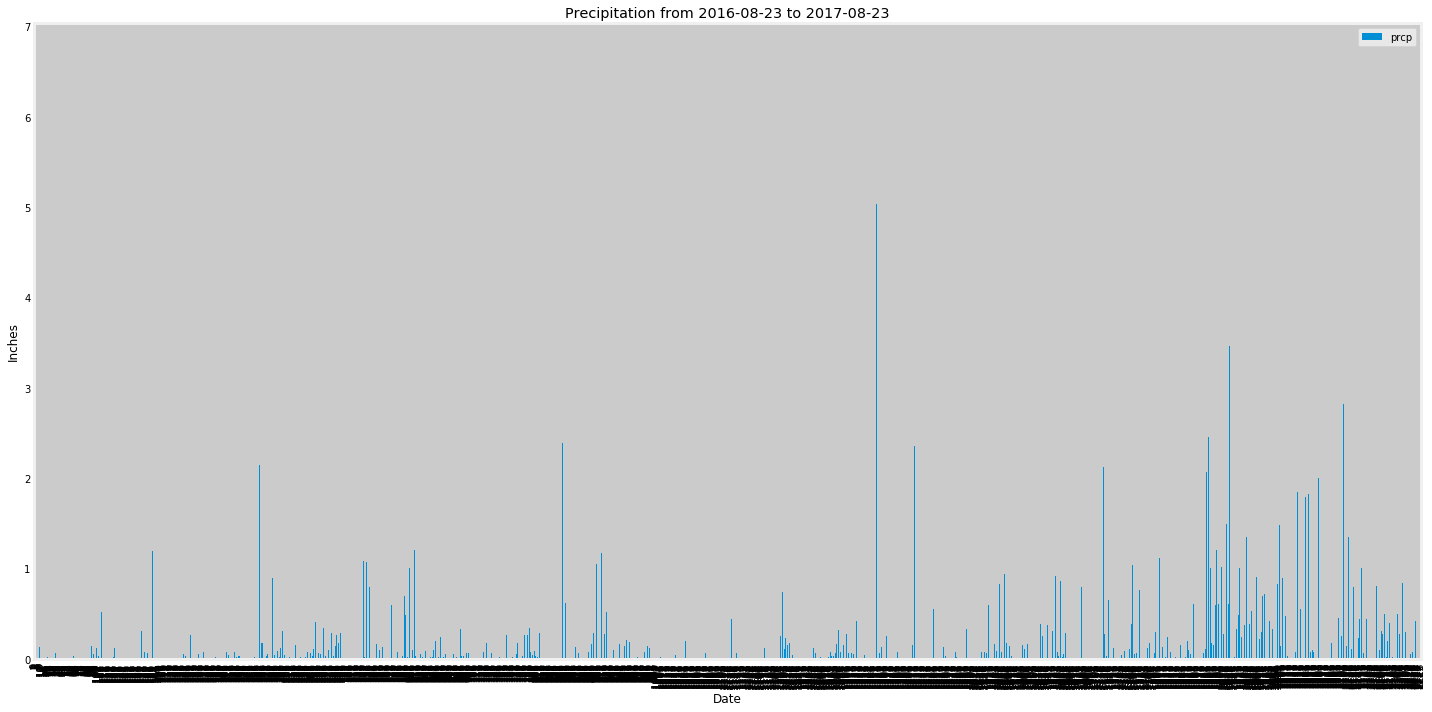

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Date = engine.execute("SELECT * FROM measurement WHERE date BETWEEN 2019-05-30 AND 2020-05-30")
for date in Date:
    print(date)
# Calculate the date 1 year ago from the last data point in the database
Max_Date = engine.execute("SELECT max(date) FROM measurement")
for date in Max_Date:
    print(date)
# Save the query results as a Pandas DataFrame and set the index to the date column
Year_Data = pd.read_sql("SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' and '2017-08-23'", conn)
#Year_Data = Year_Data.groupby(['date']).mean()
Year_Data.head(10)
Year_Data.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
Year_Data.plot(kind="bar", figsize=(20,10), rot = 90)
plt.title("Precipitation from 2016-08-23 to 2017-08-23")
plt.ylabel('Inches')
plt.xlabel('Date')
plt.tight_layout()

In [29]:
#Convert the Query to a dictionary
Year_Data.dropna(how='any')
Year_Data_Dictionary = dict(zip(Year_Data.date, Year_Data.prcp))
Year_Data_Dictionary

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': nan,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f'Mean: {Year_Data.mean()}')
print(f'Median: {Year_Data.median()}')
print(f'Variance: {Year_Data.var()}')
print(f'Standard Deviation: {Year_Data.std()}')
print(f"Roughly 68% of the data is between {round(Year_Data.mean()-Year_Data.std(),3)} and {round(Year_Data.mean()+Year_Data.std(),3)}")
print(f"Roughly 95% of the data is between {round(Year_Data.mean()-2*Year_Data.std(),3)} and {round(Year_Data.mean()+2*Year_Data.std(),3)}")
print(f"Roughly 99.7% of the data is between {round(Year_Data.mean()-3*Year_Data.std(),3)} and {round(Year_Data.mean()+3*Year_Data.std(),3)}")

Mean: prcp    0.177279
dtype: float64
Median: prcp    0.02
dtype: float64
Variance: prcp    0.212696
dtype: float64
Standard Deviation: prcp    0.46119
dtype: float64
Roughly 68% of the data is between prcp   -0.284
dtype: float64 and prcp    0.638
dtype: float64
Roughly 95% of the data is between prcp   -0.745
dtype: float64 and prcp    1.1
dtype: float64
Roughly 99.7% of the data is between prcp   -1.206
dtype: float64 and prcp    1.561
dtype: float64


Text(0, 0.5, 'Number of Days')

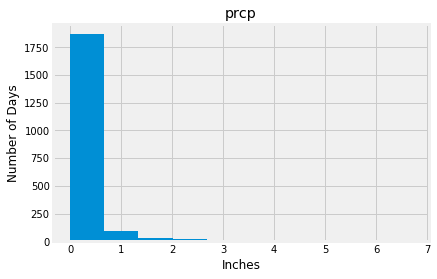

In [14]:
#Histogram
Year_Data.hist()
plt.xlabel('Inches')
plt.ylabel("Number of Days")

In [15]:
Station_Frequency_Count = []
#Design a query to calculate the total number of stations.
Station_Count = session.query(func.count(Station.station)).scalar()
Station_Count
# Inner Join Station with Measurement on station
Station_Frequency = engine.execute("select station, count(station) as 'Station_Count', tobs from measurement GROUP BY station ORDER BY Station_Count DESC")
for Count in Station_Frequency:
    print(Count)
    Station_Frequency_Count.append(Count)
#Which station has the highest number of observations?
print(f'The Station with the highest number of observation is {Station_Frequency_Count[0][0]}.')

('USC00519281', 2772, 70.0)
('USC00519397', 2724, 65.0)
('USC00513117', 2709, 67.0)
('USC00519523', 2669, 75.0)
('USC00516128', 2612, 73.0)
('USC00514830', 2202, 67.0)
('USC00511918', 1979, 66.0)
('USC00517948', 1372, 75.0)
('USC00518838', 511, 72.0)
The Station with the highest number of observation is USC00519281.


Text(0, 0.5, 'Freqency')

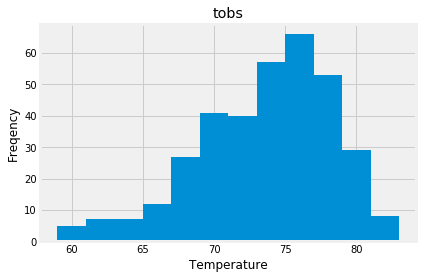

In [16]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).
TOBS_Query = pd.read_sql("SELECT tobs FROM measurement WHERE date BETWEEN '2016-08-23' and '2017-08-23' and station = 'USC00519281'", conn)
#Plot the results as a histogram with bins=12.
TOBS_Query_Hist = TOBS_Query.hist(bins=12)
TOBS_Query_Hist
plt.xlabel("Temperature")
plt.ylabel("Freqency")

In [ ]:
#Design an Climate App
